In [1]:
import numpy as np
import matplotlib.pyplot as mpl
import itertools

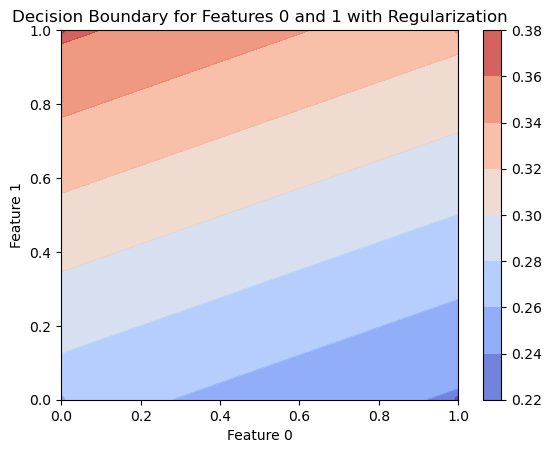

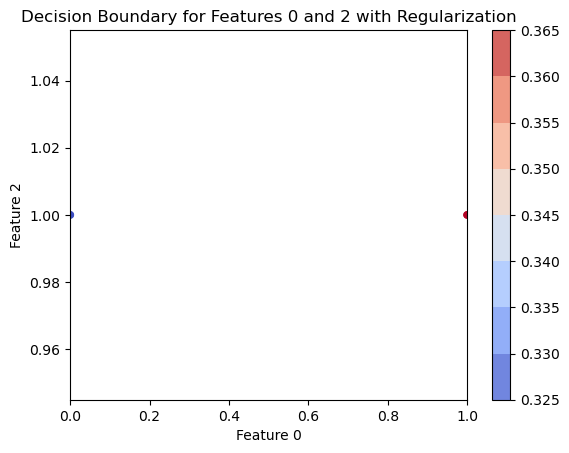

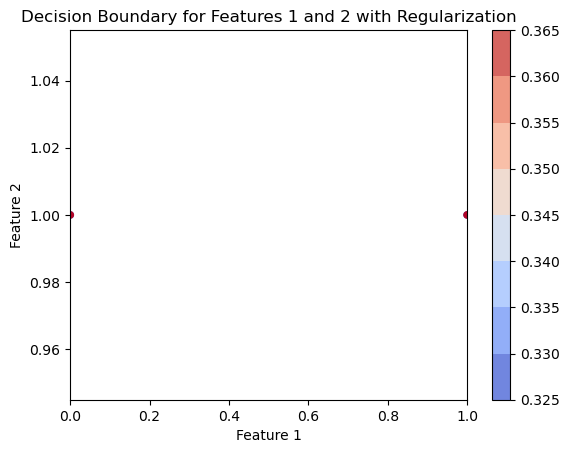

NameError: name 'l1' is not defined

In [11]:
def nonlin(x, deriv=False):  # defines sigmoid function
    if deriv:
        return x * (1-x)
    return 1 / (1 + np.exp(-x))

lambda_ = 0.01  # regularisation parameter
batch_size = 32  # mini-batch size
iterations = 10000  # number of iterations

X = np.array([[0,0,1], [0,1,1], [1,0,1], [1,1,1]])  # input
y = np.array([[0,0,1,1]]).T

np.random.seed(1)  # allows for random distribution of numbers in the same way each time

syn0 = 2 * np.random.random((3,1)) - 1  # initialises weights with weight matrix; 3,1 dimensionality connecting every node in l0 to every node in l1

for _ in range(iterations):  # trains neural network
    for batch in range(len(X) // batch_size):
        start = batch * batch_size
        end = (batch + 1) * batch_size
        l0 = X[start:end]  # forward propagation
        l1 = nonlin(np.dot(l0, syn0))
    
        li_error = y[start:end] - l1
        l1_delta = li_error * nonlin(l1, True)

        syn0 += np.dot(l0.T, l1_delta) - lambda_ * syn0  # upadtes weights
   



feature_combinations = list(itertools.combinations(range(X.shape[1]), 2))  # pairwise combination of features

for feature_pair in feature_combinations:
    feature1, feature2 = feature_pair
    mpl.scatter(X[:, feature1], X[:, feature2], c=y.flatten(), cmap=mpl.cm.coolwarm, s=20)
    xx, yy = np.meshgrid(np.linspace(np.min(X[:, feature1]), np.max(X[:, feature1]), 100),
                             np.linspace(np.min(X[:, feature2]), np.max(X[:, feature2]), 100))
    Z = nonlin(np.dot(np.c_[xx.ravel(), yy.ravel(), np.ones_like(xx.ravel())], syn0))
    Z = Z.reshape(xx.shape)
    mpl.contourf(xx, yy, Z, alpha=0.8, cmap=mpl.cm.coolwarm)

    mpl.xlabel(f'Feature {feature1}')
    mpl.ylabel(f'Feature {feature2}')
    mpl.title(f'Decision Boundary for Features {feature1} and {feature2} with Regularization')
    mpl.colorbar()
    mpl.show()
